In [1]:
# -*- coding: utf-8 -*-
import requests
import pandas as pd
import numpy as np
import io
from pandas.tseries.offsets import BDay
import pandas_datareader.data as web
import datetime as dt
import timeout_decorator
import urllib2
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import os
import matplotlib.pyplot as plt
%matplotlib inline
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import gensim
from gensim.models import Word2Vec
import pickle
from bs4 import BeautifulSoup
import csv
import codecs
import unicodedata
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import scale
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
LabeledSentence = gensim.models.doc2vec.LabeledSentence 
import tensorflow
import keras
from imblearn.over_sampling import SMOTE
#keras deep learning imports 
from keras.callbacks import History, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Embedding, Input, Flatten, Concatenate, concatenate
from keras.layers.core import Dropout
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model 
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model
from keras.applications import imagenet_utils
from keras.layers import Embedding
from keras import optimizers
from keras.callbacks import EarlyStopping
import nltk
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer
from nltk.corpus import gutenberg
from operator import mul
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

/Library/Python/2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/Library/Python/2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/malshri/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/malshri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/malshri/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/malshri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
cd Downloads

/Users/malshri/Downloads


In [3]:
start_url = "https://www.sec.gov/Archives/"
global start_url

# Get All Links to Files - save to csv

In [4]:
def get_8k_path(q_start, q_end, y_start, y_end, sample_size):
    
    sample_8K = pd.DataFrame()
    
    for year in range(y_start, y_end+1):
        
        for quarter in range(q_start, q_end+1):
            
            try:
                #requests.models.Response object
                idx_page = requests.get(start_url + "edgar/full-index/" + str(year) +"/QTR" +str(quarter) +"/master.idx")
                data = pd.read_table(io.StringIO(idx_page.content.encode('utf-8').decode('cp1252')), skiprows=11, header=None, sep="|")
                data.columns = ['CIK','Company_Name','Form_Type','Date_Filed','FileName']
                
                filtered_8K = data[data["Form_Type"].isin(["8-K","8-K/A"])].sample(sample_size)
                filtered_8K['Year_Quarter'] = "Y" + str(year)+ "Q" + str(quarter)
                
                sample_8K = sample_8K.append(filtered_8K)
                
            except Exception as e:
                print 'Exception' 
                print e
                continue 
    
    sample_8K.to_csv("sample_8K.csv", index=False)
    print 'DONE SAMPLING 8K!'

In [277]:
##download 500 reports 
get_8k_path(1, 4, 2016, 2016, 700)

DONE SAMPLING 8K!


# Parse files, clean text, save

In [5]:
def read_8k_data(sample_data_filename):
    
    all_data = pd.DataFrame()
    filtered_df = pd.read_csv(sample_data_filename)
    tokenizer = get_tokenizer()
    
    for i in range(len(filtered_df)):
        
        try: 
        
            url_end = filtered_df.iloc[i]['FileName']
            url_txt = start_url + url_end

            CIK = str(filtered_df.iloc[i]['CIK'])
            date_filed = str(filtered_df.iloc[i]['Date_Filed'])
            new_file_name = CIK + '_' + date_filed + '.txt'

            response = urllib2.urlopen(url_txt)
            data = response.read()

            text_cleaned_dict = get_dict(tokenizer, data)        
            
            if text_cleaned_dict['form'][0]:
                
                df_dict = pd.DataFrame.from_dict(text_cleaned_dict)
                frames = [all_data, df_dict]
                all_data = pd.concat(frames)
            
            else:
                continue
                
        except Exception as e:
            print 'Exception'
            print e
            print text_cleaned_dict
            continue
                
    return all_data

In [278]:
all_data = read_8k_data("sample_8K.csv")

Exception
arrays must all be same length
{'industry': [], 'form': [['departure', 'trustees', 'certain', 'officers', 'election', 'trustees', 'appointment', 'certain', 'officers', 'compensatory', 'arrangements', 'certain', 'officerson', 'decesaris', 'was', 'elected', 'member', 'chairman', 'trustees', 'credit', 'income', 'fund', 'company', 'reviously', 'february', 'appointed', 'decesaris', 'position', 'chief', 'executive', 'officer', 'company', 'effective', 'decesaris', 'age', 'has', 'served', 'chief', 'executive', 'officer', 'inc', 'since', 'february', 'member', 'its', 'directors', 'since', 'july', 'decesaris', 'was', 'chief', 'financial', 'officer', 'corporate', 'property', 'associates', 'global', 'incorporated', 'having', 'served', 'acting', 'chief', 'financial', 'officer', 'since', 'respectively', 'was', 'also', 'chief', 'financial', 'officer', 'corporate', 'property', 'associates', 'global', 'incorporated', 'watermark', 'investors', 'incorporated', 'decesaris', 'has', 'also', 'member

Exception
arrays must all be same length
{'industry': [], 'form': [['results', 'operations', 'financial', 'condition', 'fs', 'investment', 'corporation', 'company', 'increased', 'public', 'offering', 'its', 'class', 'common', 'per', 'share', 'per', 'share', 'increase', 'public', 'offering', 'was', 'effective', 'companys', 'weekly', 'closing', 'applied', 'subscriptions', 'received', 'purpose', 'increase', 'public', 'offering', 'was', 'ensure', 'net', 'asset', 'value', 'per', 'share', 'class', 'common', 'exceed', 'offering', 'per', 'share', 'class', 'common', 'deducting', 'selling', 'commissions', 'required', 'investment', 'company', 'act', 'amended', 'ignature', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'amended', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'signed', 'its', 'behalf', 'undersigned', 'hereunto', 'duly', 'authorized', 'investment', 'corporation', 'sypherd', 'sypherd', 'president']], 'item info': ['Results of Operations and Financial Conditio

Exception
arrays must all be same length
{'industry': [], 'form': [['events', 'capital', 'corporation', 'directors', 'declared', 'dividend', 'per', 'share', 'common', 'dividend', 'payable', 'shareholders', 'record', 'copy', 'press', 'release', 'attached', 'hereto', 'exhibit', 'incorporated', 'herein', 'reference', 'financial', 'statements', 'exhibits', 'none', 'none', 'none', 'exhibits', 'exhibit', 'number', 'description', 'press', 'release', 'dated', 'signatures', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'signed', 'its', 'behalf', 'undersigned', 'hereunto', 'duly', 'authorized', 'ated', 'sarner', 'name', 'sarner', 'title', 'chief', 'financial', 'officer', 'exhibit', 'centre', 'freeway', 'suite', 'dallas', 'texas', 'capital', 'announces', 'per', 'share', 'dividend', 'ended', 'quarterly', 'dividend', 'paid', 'since', 'spinoff', 'csw', 'industrials', 'dallas', 'texas', 'capital', 'corporation', 'capital', 'compa

Exception
arrays must all be same length
{'industry': [], 'form': [['submission', 'matters', 'vote', 'security', 'holders', 'income', 'fund', 'inc', 'company', 'its', 'meeting', 'stockholders', 'meeting', 'tockholders', 'record', 'business', 'january', 'entitled', 'vote', 'meeting', 'january', 'record', 'shares', 'common', 'outstanding', 'entitled', 'vote', 'quorum', 'consisting', 'shares', 'common', 'was', 'present', 'represented', 'proxy', 'meeting', 'purpose', 'meeting', 'was', 'consider', 'vote', 'upon', 'reelection', 'jennings', 'milde', 'serve', 'class', 'director', 'companys', 'meeting', 'stockholders', 'successor', 'duly', 'elected', 'qualified', 'meeting', 'stockholders', 'elected', 'director', 'nominees', 'following', 'votes', 'cast', 'connection', 'election', 'directors', 'director', 'nominee', 'votes', 'votes', 'votes', 'withheld', 'jennings', 'milde', 'signatures', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'amended', 'registrant', 'has', 'duly', 'caused'

Exception
expected name token at u'<![8:G4%ELI5/PP/@>,-', at line 679, column 39
{'industry': ['LEATHER & LEATHER PRODUCTS [3100]'], 'form': [['results', 'operations', 'financial', 'condition', 'january', 'coach', 'inc', 'company', 'issued', 'press', 'release', 'press', 'release', 'company', 'announced', 'its', 'financial', 'results', 'its', 'fiscal', 'ended', 'december', 'information', 'press', 'release', 'being', 'furnished', 'securities', 'exchange', 'commission', 'shall', 'deemed', 'filed', 'purposes', 'section', 'securities', 'exchange', 'act', 'exchange', 'act', 'otherwise', 'subject', 'liability', 'section', 'shall', 'deemed', 'incorporated', 'reference', 'any', 'filing', 'securities', 'act', 'amended', 'exchange', 'act', 'except', 'expressly', 'set', 'forth', 'specific', 'reference', 'filing', 'financial', 'statements', 'exhibits', 'exhibits', 'following', 'exhibit', 'being', 'furnished', 'herewith', 'text', 'press', 'release', 'dated', 'january', 'signature', 'pursuant', 'requ

Exception in calc_sent_measure!
float division by zero
Exception in calc_sent_measure!
float division by zero
Exception
arrays must all be same length
{'industry': [], 'form': [['events', 'eclaration', 'distribution', 'february', 'trustees', 'corporate', 'capital', 'trust', 'company', 'declared', 'distribution', 'represents', 'annualized', 'distribution', 'yield', 'based', 'companys', 'current', 'public', 'offering', 'per', 'share', 'distribution', 'based', 'weekly', 'record', 'dates', 'beginning', 'including', 'distribution', 'paid', 'monthly', 'annualized', 'distribution', 'yield', 'interpreted', 'measure', 'companys', 'current', 'future', 'performances', 'anticipated', 'distributions', 'substantially', 'supported', 'net', 'investment', 'income', 'realized', 'gains', 'sources', 'distributions', 'disclosed', 'companys', 'regular', 'financial', 'reports', 'record', 'dates', 'payment', 'dates', 'follows', 'distribution', 'record', 'distribution', 'payment', 'declared', 'distribution', '

Exception in calc_sent_measure!
float division by zero
Exception
arrays must all be same length
{'industry': [], 'form': [['events', 'february', 'registrant', 'issued', 'press', 'release', 'copy', 'press', 'release', 'attached', 'hereto', 'exhibit', 'incorporated', 'herein', 'reference', 'information', 'disclosed', 'herein', 'including', 'exhibit', 'hereto', 'shall', 'deemed', 'filed', 'purposes', 'section', 'securities', 'exchange', 'act', 'shall', 'deemed', 'incorporated', 'reference', 'any', 'filing', 'made', 'securities', 'act', 'except', 'expressly', 'set', 'forth', 'specific', 'reference', 'filing', 'financial', 'statements', 'exhibits', 'exhibits', 'press', 'release', 'dated', 'february', 'signatures', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'signed', 'its', 'behalf', 'undersigned', 'hereunto', 'duly', 'authorized', 'capital', 'corporation', 'february', 'beauvais', 'name', 'beauvais', 'title', 'general

Exception
arrays must all be same length
{'industry': [], 'form': [['results', 'operations', 'financial', 'condition', 'directors', 'fs', 'investment', 'corporation', 'company', 'declared', 'regular', 'weekly', 'distributions', 'regular', 'weekly', 'distributions', 'amount', 'per', 'share', 'payable', 'monthly', 'stockholders', 'record', 'weekly', 'record', 'dates', 'set', 'forth', 'ecord', 'payment', 'distribution', 'amount', 'certain', 'information', 'distributions', 'determination', 'tax', 'attributes', 'companys', 'distributions', 'made', 'annually', 'end', 'companys', 'fiscal', 'based', 'upon', 'its', 'taxable', 'income', 'distributions', 'paid', 'full', 'herefore', 'determination', 'tax', 'attributes', 'distributions', 'made', 'quarterly', 'basis', 'representative', 'actual', 'tax', 'attributes', 'full', 'company', 'intends', 'update', 'stockholders', 'quarterly', 'estimated', 'percentage', 'its', 'distributions', 'resulted', 'taxable', 'ordinary', 'income', 'actual', 'tax', 'cha

Exception
arrays must all be same length
{'industry': [], 'form': [['events', 'connection', 'its', 'ongoing', 'public', 'offering', 'common', 'income', 'corporation', 'company', 'raised', 'equity', 'associated', 'business', 'days', 'capital', 'raising', 'bringing', 'companys', 'total', 'amount', 'equity', 'capital', 'raised', 'signatures', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'signed', 'its', 'behalf', 'undersigned', 'hereunto', 'duly', 'authorized', 'ate', 'income', 'corporation', 'allorto', 'jr', 'allorto', 'jr', 'chief', 'financial', 'officer']], 'item info': ['Other Events'], 'company name': ['Sierra Income Corp'], 'label': 'NM'}
Exception
arrays must all be same length
{'industry': [], 'form': [['results', 'operations', 'financial', 'condition', 'change', 'net', 'offering', 'nexpoint', 'capital', 'inc', 'company', 'increased', 'its', 'public', 'offering', 'per', 'share', 'per', 'share', 'increase', 'p

Exception in calc_sent_measure!
float division by zero
Exception
unknown status keyword u'M' in marked section, at line 295, column 45
{'industry': ['SERVICES-PREPACKAGED SOFTWARE [7372]'], 'form': [['submission', 'matters', 'vote', 'security', 'holders', 'meeting', 'stockholders', 'asteas', 'stockholders', 'approved', 'proposals', 'listed', 'constituted', 'matters', 'acted', 'upon', 'meeting', 'final', 'results', 'votes', 'regarding', 'proposal', 'set', 'forth', 'proposals', 'described', 'detail', 'proxy', 'statement', 'astea', 'international', 'inc', 'was', 'filed', 'securities', 'exchange', 'commission', 'election', 'directors', 'serve', 'serve', 'asteas', 'meeting', 'stockholders', 'his', 'successor', 'elected', 'qualified', 'his', 'death', 'resignation', 'removal', 'name', 'votes', 'votes', 'withheld', 'broker', 'nonvotes', 'bergreen', 'schneck', 'approval', 'companys', 'option', 'plan', 'otes', 'votes', 'abstentions', 'broker', 'nonvotes', 'ratification', 'appointment', 'eisneram

Exception
arrays must all be same length
{'industry': [], 'form': [['results', 'operations', 'financial', 'condition', 'directors', 'fs', 'investment', 'corporation', 'company', 'declared', 'regular', 'monthly', 'distributions', 'amount', 'per', 'share', 'july', 'september', 'regular', 'monthly', 'distributions', 'paid', 'payments', 'dates', 'set', 'forth', 'stockholders', 'record', 'record', 'dates', 'set', 'forth', 'ecord', 'payment', 'distribution', 'amount', 'certain', 'information', 'distributions', 'determination', 'tax', 'attributes', 'companys', 'distributions', 'made', 'annually', 'end', 'companys', 'fiscal', 'based', 'upon', 'its', 'taxable', 'income', 'distributions', 'paid', 'full', 'herefore', 'determination', 'tax', 'attributes', 'distributions', 'made', 'quarterly', 'basis', 'representative', 'actual', 'tax', 'attributes', 'full', 'company', 'intends', 'update', 'stockholders', 'quarterly', 'estimated', 'percentage', 'its', 'distributions', 'resulted', 'taxable', 'ordina

Exception
expected name token at u'<![=9#\'GK%4V"*H""(3T', at line 520, column 25
{'industry': ['NATIONAL COMMERCIAL BANKS [6021]'], 'form': [['departure', 'directors', 'certain', 'officers', 'election', 'directors', 'appointment', 'certain', 'officers', 'compensatory', 'arrangements', 'certain', 'officers', 'citi', 'filed', 'its', 'proxy', 'statement', 'disclosing', 'compensation', 'awards', 'made', 'personnel', 'compensation', 'committee', 'citigroup', 'directors', 'committee', 'citis', 'named', 'executive', 'officers', 'performance', 'ollowing', 'filing', 'support', 'investors', 'awards', 'granted', 'performance', 'also', 'concerns', 'stakeholders', 'regarding', 'citis', 'performance', 'share', 'unit', 'psu', 'program', 'committee', 'has', 'considered', 'issues', 'raised', 'remains', 'fully', 'committed', 'robust', 'payforperformance', 'executive', 'compensation', 'program', 'ccordingly', 'committee', 'modified', 'psu', 'awards', 'granted', 'february', 'reflected', 'performance', 'r

Exception in calc_sent_measure!
float division by zero
Exception
unknown status keyword u'S5' in marked section, at line 733, column 54
{'industry': ['MALT BEVERAGES [2082]'], 'form': [['entry', 'material', 'definitive', 'agreementcontract', 'brewing', 'agreementon', 'brew', 'alliance', 'inc', 'cba', 'entered', 'contract', 'brewing', 'agreement', 'brewing', 'agreement', 'ab', 'commercial', 'strategies', 'llc', 'abcs', 'affiliate', 'anheuserbusch', 'llc', 'ab', 'pursuant', 'abcs', 'brew', 'bottle', 'package', 'barrels', 'mutually', 'agreed', 'cba', 'products', 'annually', 'facilities', 'owned', 'abcs', 'within', 'united', 'states', 'initial', 'term', 'december', 'terms', 'brewing', 'agreement', 'cba', 'abcs', 'equally', 'share', 'any', 'cost', 'savings', 'arising', 'brewing', 'agreement', 'provided', 'cbas', 'cost', 'savings', 'shall', 'equal', 'least', 'per', 'barrel', 'aggregate', 'basis', 'following', 'certain', 'adjustments', 'set', 'forth', 'brewing', 'agreementthe', 'brewing', 'ag

Exception
arrays must all be same length
{'industry': [], 'form': [['events', 'nvestment', 'policy', 'revision', 'effective', 'number', 'nuveen', 'amtfree', 'nonamt', 'municipal', 'closedend', 'funds', 'approved', 'changes', 'investment', 'policies', 'altering', 'limits', 'exposure', 'securities', 'subject', 'federal', 'alternative', 'minimum', 'tax', 'applicable', 'individuals', 'amt', 'mt', 'municipal', 'funds', 'amtfree', 'funds', 'listed', 'adopted', 'investment', 'policy', 'require', 'funds', 'invest', 'its', 'managed', 'assets', 'securities', 'income', 'exempt', 'amt', 'time', 'purchase', 'hile', 'funds', 'previously', 'being', 'managed', 'amt', 'policy', 'addition', 'current', 'policy', 'requires', 'only', 'funds', 'assets', 'invested', 'securities', 'exempt', 'amt', 'policy', 'was', 'adopted', 'meet', 'names', 'investment', 'company', 'act', 'subject', 'change', 'upon', 'days', 'notice', 'shareholders', 'amt', 'policy', 'subject', 'change', 'funds', 'without', 'shareholder', 'n

Exception
unknown status keyword u'K' in marked section, at line 1794, column 30
{'industry': ['PHARMACEUTICAL PREPARATIONS [2834]'], 'form': [['eventson', 'registrant', 'issued', 'press', 'release', 'copy', 'attached', 'hereto', 'exhibit', 'incorporated', 'herein', 'reference', 'financial', 'statements', 'exhibitsexhibit', 'press', 'release', 'dated', 'signaturepursuant', 'requirements', 'securities', 'exchange', 'act', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'signed', 'its', 'behalf', 'undersigned', 'hereunto', 'duly', 'authorized', 'rbutus', 'biopharma', 'corporation', 'cousins', 'cousins', 'executive', 'president', 'chief', 'financial', 'officer', 'exhibit', 'arbutus', 'announces', 'issuance', 'broad', 'us', 'patent', 'lnp', 'delivery', 'technology', 'patent', 'covers', 'lipid', 'particle', 'compositions', 'known', 'effective', 'delivery', 'nucleic', 'acids', 'including', 'mrna', 'vancouver', 'bc', 'nd', 'doylestown', 'globe', 'newswire', 'arbutus', 'biopharma', 'c

Exception
arrays must all be same length
{'industry': [], 'form': [['regulation', 'fd', 'disclosure', 'item', 'financial', 'statements', 'exhibits', 'signatures', 'exhibit', 'index', 'monthly', 'review', 'funds', 'performance', 'funds', 'investment', 'adviser', 'item', 'regulation', 'fd', 'disclosure', 'pursuant', 'regulation', 'fd', 'rules', 'jpmorgan', 'region', 'fund', 'inc', 'fund', 'furnishes', 'monthly', 'review', 'funds', 'performance', 'funds', 'investment', 'adviser', 'financial', 'statements', 'exhibits', 'exhibits', 'exhibit', 'description', 'monthly', 'review', 'funds', 'performance', 'funds', 'investment', 'adviser', 'signature', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'signed', 'its', 'behalf', 'undersigned', 'hereunto', 'duly', 'authorized', 'pmorgan', 'region', 'fund', 'inc', 'lucy', 'september', 'name', 'lucy', 'title', 'secretary', 'benchmarka', 'performance', 'data', 'sci', 'dragon', 'index

Exception in calc_sent_measure!
float division by zero
Exception in calc_sent_measure!
float division by zero
Exception in calc_sent_measure!
float division by zero
Exception in calc_sent_measure!
float division by zero
Exception in calc_sent_measure!
float division by zero
Exception
arrays must all be same length
{'industry': [], 'form': [['entry', 'material', 'definitive', 'agreement', 'mendments', 'credit', 'facilities', 'september', 'closing', 'capital', 'corporation', 'company', 'entered', 'amendment', 'its', 'existing', 'amended', 'restated', 'senior', 'secured', 'revolving', 'credit', 'agreement', 'revolver', 'amendment', 'amendment', 'its', 'existing', 'amended', 'restated', 'senior', 'secured', 'term', 'credit', 'agreement', 'term', 'amendment', 'together', 'revolver', 'amendment', 'amendments', 'certain', 'lenders', 'party', 'thereto', 'ing', 'capital', 'llc', 'administrative', 'agent', 'administrative', 'agent', 'solely', 'respect', 'section', 'amendment', 'mcc', 'investment

Exception
arrays must all be same length
{'industry': [], 'form': [['events', 'nvestment', 'policy', 'revision', 'effective', 'number', 'nuveen', 'amtfree', 'nonamt', 'municipal', 'closedend', 'funds', 'approved', 'changes', 'investment', 'policies', 'altering', 'limits', 'exposure', 'securities', 'subject', 'federal', 'alternative', 'minimum', 'tax', 'applicable', 'individuals', 'amt', 'mt', 'municipal', 'funds', 'amtfree', 'funds', 'listed', 'adopted', 'investment', 'policy', 'require', 'funds', 'invest', 'its', 'managed', 'assets', 'securities', 'income', 'exempt', 'amt', 'time', 'purchase', 'hile', 'funds', 'previously', 'being', 'managed', 'amt', 'policy', 'addition', 'current', 'policy', 'requires', 'only', 'funds', 'assets', 'invested', 'securities', 'exempt', 'amt', 'policy', 'was', 'adopted', 'meet', 'names', 'investment', 'company', 'act', 'subject', 'change', 'upon', 'days', 'notice', 'shareholders', 'amt', 'policy', 'subject', 'change', 'funds', 'without', 'shareholder', 'n

Exception
arrays must all be same length
{'industry': [], 'form': [['results', 'operations', 'financial', 'conditionon', 'september', 'credit', 'income', 'fund', 'company', 'increased', 'its', 'public', 'offering', 'per', 'share', 'per', 'share', 'increase', 'public', 'offering', 'effective', 'companys', 'september', 'weekly', 'closing', 'applied', 'subscriptions', 'received', 'order', 'september', 'september', 'accordance', 'companys', 'previously', 'disclosed', 'share', 'pricing', 'policy', 'company', 'determined', 'increase', 'public', 'offering', 'per', 'share', 'was', 'warranted', 'following', 'increase', 'companys', 'net', 'asset', 'value', 'per', 'share', 'september', 'result', 'increase', 'companys', 'public', 'offering', 'maximum', 'sales', 'load', 'net', 'proceeds', 'per', 'share', 'approximately', 'per', 'share', 'per', 'share', 'respectivelysignatures', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'sig

Exception
arrays must all be same length
{'industry': [], 'form': [['regulation', 'fd', 'disclosure', 'july', 'sachs', 'bdc', 'inc', 'company', 'issued', 'press', 'release', 'announcing', 'report', 'its', 'ended', 'financial', 'results', 'market', 'closes', 'copy', 'press', 'release', 'attached', 'hereto', 'exhibit', 'information', 'disclosed', 'this', 'item', 'including', 'exhibit', 'hereto', 'being', 'furnished', 'shall', 'deemed', 'filed', 'company', 'purposes', 'section', 'securities', 'exchange', 'act', 'amended', 'exchange', 'act', 'otherwise', 'subject', 'liabilities', 'section', 'shall', 'deemed', 'incorporated', 'reference', 'any', 'filing', 'securities', 'act', 'amended', 'exchange', 'act', 'except', 'shall', 'expressly', 'set', 'forth', 'specific', 'reference', 'filing', 'financial', 'statements', 'exhibits', 'exhibits', 'exhibit', 'number', 'description', 'press', 'release', 'sachs', 'bdc', 'inc', 'dated', 'july', 'signatures', 'pursuant', 'requirements', 'securities', 'exc

Exception in calc_sent_measure!
float division by zero
Exception in calc_sent_measure!
float division by zero
Exception
arrays must all be same length
{'industry': [], 'form': [['amendments', 'articles', 'incorporation', 'bylaws', 'change', 'fiscal', 'ffective', 'july', 'directors', 'capital', 'corporation', 'company', 'approved', 'amendments', 'amendments', 'companys', 'bylaws', 'bylaws', 'addition', 'technical', 'revisions', 'amendments', 'made', 'following', 'substantive', 'changes', 'article', 'section', 'was', 'amended', 'provide', 'meeting', 'shareholders', 'selected', 'directors', 'nder', 'provision', 'meeting', 'shareholders', 'was', 'required', 'within', 'days', 'before', 'determined', 'chairman', 'directors', 'rticle', 'section', 'was', 'amended', 'provide', 'only', 'chairman', 'president', 'majority', 'entire', 'directors', 'office', 'special', 'meeting', 'shareholders', 'nder', 'provision', 'holders', 'less', 'shares', 'entitled', 'vote', 'meeting', 'shareholders', 'also', 

Exception
arrays must all be same length
{'industry': [], 'form': [['regulation', 'fd', 'disclosure', 'october', 'trustees', 'blackrock', 'utility', 'infrastructure', 'trust', 'fund', 'amended', 'restated', 'its', 'entirety', 'bylaws', 'fund', 'amended', 'restated', 'bylaws', 'amend', 'article', 'section', 'bylaws', 'relating', 'election', 'trustees', 'amended', 'restated', 'bylaws', 'deemed', 'effective', 'october', 'copy', 'amended', 'restated', 'bylaws', 'included', 'exhibit', 'this', 'report', 'incorporated', 'reference', 'herein', 'financial', 'statements', 'exhibits', 'exhibits', 'xhibit', 'number', 'description', 'amended', 'restated', 'bylaws', 'blackrock', 'utility', 'infrastructure', 'trust', 'effective', 'october', 'signatures', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'signed', 'its', 'behalf', 'undersigned', 'hereunto', 'duly', 'authorized', 'lackrock', 'utility', 'infrastructure', 'trust', 'name'

Exception
expected name token at u"<![+-O*'@<W\nM5YY;+RV", at line 1173, column 54
{'industry': ['PHARMACEUTICAL PREPARATIONS [2834]'], 'form': [['submission', 'matters', 'vote', 'security', 'holdersthe', 'meeting', 'shareholders', 'meeting', 'acucela', 'inc', 'company', 'was', 'october', 'meeting', 'proxies', 'representing', 'shares', 'companys', 'common', 'approximately', 'total', 'shares', 'entitled', 'vote', 'present', 'voted', 'approve', 'adoption', 'merger', 'agreement', 'among', 'company', 'acucela', 'kk', 'acucela', 'inc', 'us', 'merger', 'co', 'pursuant', 'company', 'merged', 'us', 'merger', 'co', 'us', 'merger', 'co', 'surviving', 'merger', 'whollyowned', 'subsidiary', 'acucela', 'kk', 'redomicile', 'transaction', 'elect', 'nominees', 'directors', 'ratify', 'appointment', 'bdo', 'llp', 'companys', 'independent', 'registered', 'public', 'accounting', 'firm', 'adjournment', 'proposal', 'was', 'acted', 'upon', 'meeting', 'proposals', 'related', 'matter', 'described', 'detail', '

Exception
arrays must all be same length
{'industry': [], 'form': [['exhibits', 'exhibits', 'exhibit', 'number', 'description', 'custody', 'agreement', 'wells', 'fargo', 'ignatures', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'signed', 'its', 'behalf', 'undersigned', 'hereunto', 'duly', 'authorized', 'peaks', 'cooptivist', 'income', 'bdc', 'inc', 'december', 'gurpreet', 'chandhoke', 'gurpreet', 'chandhoke', 'chairman', 'directors', 'chief', 'executive', 'officer', 'president', 'peaks', 'cooptivist', 'income', 'bdc', 'inc', 'exhibit', 'client', 'agreement', 'igeneral', 'account', 'terms', 'conditions', 'introduction', 'terms', 'conditions', 'this', 'client', 'agreement', 'agreement', 'control', 'brokerage', 'account', 'advisory', 'program', 'account', 'opening', 'wells', 'fargo', 'advisors', 'llc', 'wfa', 'wells', 'fargo', 'advisors', 'financial', 'network', 'llc', 'wfafn', 'any', 'brokerage', 'account', 'open', 

Exception in calc_sent_measure!
float division by zero
Exception
arrays must all be same length
{'industry': [], 'form': [['eventson', 'october', 'trustees', 'credit', 'income', 'fund', 'company', 'approved', 'resolution', 'extend', 'companys', 'offering', 'period', 'past', 'december', 'its', 'public', 'offering', 'investors', 'february', 'following', 'closing', 'offering', 'company', 'expects', 'subject', 'boards', 'discretion', 'applicable', 'lawit', 'continue', 'conduct', 'quarterly', 'tender', 'offers', 'pursuant', 'its', 'share', 'repurchase', 'programdistributions', 'continue', 'declared', 'paid', 'monthly', 'basis', 'andthe', 'companys', 'distribution', 'reinvestment', 'plan', 'remain', 'effect', 'participating', 'shareholders', 'able', 'reinvest', 'distributions', 'net', 'asset', 'value', 'per', 'share', 'determined', 'management', 'companythe', 'company', 'continue', 'finite', 'term', 'years', 'closing', 'this', 'initial', 'public', 'offering', 'contemplated', 'before', 'decem

Exception
arrays must all be same length
{'industry': [], 'form': [['november', 'hercules', 'capital', 'inc', 'issued', 'press', 'release', 'announcing', 'its', 'earnings', 'ended', 'september', 'declared', 'dividend', 'text', 'press', 'release', 'included', 'exhibit', 'this', 'form', 'this', 'information', 'disclosed', 'this', 'item', 'including', 'exhibit', 'hereto', 'being', 'furnished', 'shall', 'deemed', 'filed', 'purposes', 'section', 'securities', 'exchange', 'act', 'shall', 'deemed', 'incorporated', 'reference', 'any', 'filing', 'made', 'securities', 'act', 'except', 'expressly', 'set', 'forth', 'specific', 'reference', 'filing', 'financial', 'statements', 'exhibits', 'exhibits', 'press', 'release', 'dated', 'november', 'signatures', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'signed', 'its', 'behalf', 'undersigned', 'hereunto', 'duly', 'authorized', 'ercules', 'capital', 'inc', 'november', 'melanie', 'm

Exception in calc_sent_measure!
float division by zero
Exception
arrays must all be same length
{'industry': [], 'form': [['events', 'effective', 'october', 'directors', 'triton', 'pacific', 'investment', 'corporation', 'inc', 'company', 'declared', 'monthly', 'distribution', 'october', 'per', 'share', 'payable', 'november', 'shareholders', 'record', 'october', 'certain', 'information', 'distributions', 'determination', 'tax', 'attributes', 'companys', 'distributions', 'made', 'annually', 'end', 'companys', 'fiscal', 'based', 'upon', 'its', 'taxable', 'income', 'distributions', 'paid', 'full', 'herefore', 'determination', 'tax', 'attributes', 'distributions', 'made', 'quarterly', 'monthly', 'basis', 'representative', 'actual', 'tax', 'attributes', 'full', 'company', 'intends', 'update', 'shareholders', 'quarterly', 'estimated', 'percentage', 'its', 'distributions', 'resulted', 'taxable', 'ordinary', 'income', 'actual', 'tax', 'characteristics', 'distributions', 'shareholders', 'reporte

Exception in calc_sent_measure!
float division by zero
Exception
arrays must all be same length
{'industry': [], 'form': [['results', 'operations', 'financial', 'condition', 'november', 'ofs', 'capital', 'corporation', 'company', 'issued', 'press', 'release', 'announcing', 'its', 'financial', 'results', 'ended', 'september', 'october', 'companys', 'directors', 'declared', 'distribution', 'per', 'common', 'share', 'payable', 'december', 'shareholders', 'record', 'december', 'full', 'text', 'press', 'release', 'issued', 'connection', 'announcement', 'furnished', 'exhibit', 'this', 'current', 'report', 'form', 'information', 'disclosed', 'this', 'item', 'including', 'exhibit', 'hereto', 'being', 'furnished', 'shall', 'deemed', 'filed', 'purposes', 'section', 'securities', 'exchange', 'act', 'amended', 'exchange', 'act', 'otherwise', 'subject', 'liabilities', 'section', 'shall', 'deemed', 'incorporated', 'reference', 'any', 'filing', 'made', 'securities', 'exchange', 'act', 'amended', 'exc

Exception in calc_sent_measure!
float division by zero
Exception
arrays must all be same length
{'industry': [], 'form': [['entry', 'material', 'definitive', 'agreement', 'mendment', 'expense', 'support', 'conditional', 'reimbursement', 'agreement', 'november', 'freedom', 'capital', 'corporation', 'company', 'entered', 'amended', 'restated', 'expense', 'support', 'conditional', 'reimbursement', 'agreement', 'amended', 'restated', 'expense', 'support', 'agreement', 'freedom', 'capital', 'investment', 'advisors', 'llc', 'companys', 'investment', 'adviser', 'adviser', 'amended', 'restated', 'expense', 'support', 'agreement', 'amended', 'expense', 'support', 'conditional', 'reimbursement', 'agreement', 'dated', 'provide', 'reimbursements', 'company', 'adviser', 'expenses', 'amount', 'portion', 'companys', 'distributions', 'stockholders', 'paid', 'offering', 'proceeds', 'borrowings', 'andor', 'reduce', 'companys', 'operating', 'expenses', 'has', 'achieved', 'economies', 'scale', 'sufficient

Exception
unknown status keyword u'EU65' in marked section, at line 1784, column 16
{'industry': ['HOUSEHOLD APPLIANCES [3630]'], 'form': [['changes', 'registrants', 'certifying', 'accountant', 'dismissal', 'auditor', 'october', 'bollente', 'companies', 'inc', 'registrant', 'dismissed', 'seale', 'beers', 'cpas', 'seale', 'beers', 'independent', 'registered', 'public', 'accountants', 'october', 'directors', 'company', 'authorized', 'dismissal', 'uring', 'fiscal', 'ended', 'december', 'seale', 'beerss', 'dismissal', 'october', 'disagreements', 'seale', 'beers', 'any', 'matter', 'accounting', 'principles', 'practices', 'financial', 'statement', 'disclosure', 'auditing', 'scope', 'procedures', 'disagreements', 'resolved', 'satisfaction', 'seale', 'beers', 'would', 'caused', 'seale', 'beers', 'make', 'reference', 'subject', 'matter', 'disagreements', 'connection', 'its', 'reports', 'events', 'type', 'listed', 'paragraphs', 'item', 'regulation', 'sk', 'furnished', 'seale', 'beers', 'copy', '

Exception
expected name token at u'<![_7-?\nM:ZL4ZE2^I]:', at line 31163, column 58
{'industry': ['OIL AND GAS FIELD EXPLORATION SERVICES [1382]'], 'form': [['entry', 'material', 'definitive', 'agreement', 'reorganization', 'previously', 'reported', 'energy', 'xxi', 'ltd', 'exempted', 'company', 'company', 'energy', 'xxi', 'petition', 'company', 'energy', 'xxi', 'coast', 'inc', 'indirect', 'whollyowned', 'subsidiary', 'company', 'egc', 'epl', 'oil', 'gas', 'inc', 'indirect', 'whollyowned', 'subsidiary', 'company', 'epl', 'certain', 'subsidiaries', 'company', 'together', 'company', 'egc', 'epl', 'debtors', 'filed', 'voluntary', 'petitions', 'reorganization', 'united', 'states', 'bankruptcy', 'court', 'district', 'texas', 'division', 'bankruptcy', 'court', 'seeking', 'relief', 'provisions', 'chapter', 'title', 'chapter', 'united', 'states', 'code', 'bankruptcy', 'code', 'caption', 'energy', 'xxi', 'ltd', 'et', 'chapter', 'cases', 'july', 'bankruptcy', 'court', 'entered', 'order', 'approv

Exception
unknown status keyword u'CKW' in marked section, at line 906, column 13
{'industry': ['NATIONAL COMMERCIAL BANKS [6021]'], 'form': [['events', 'november', 'office', 'comptroller', 'currency', 'occ', 'issued', 'statement', 'regarding', 'revocation', 'relief', 'wells', 'fargo', 'bank', 'rom', 'certain', 'regulatory', 'consequences', 'previous', 'enforcement', 'actions', 'copy', 'occs', 'statement', 'included', 'exhibit', 'this', 'report', 'incorporated', 'reference', 'this', 'item', 'item', 'financial', 'statements', 'exhibits', 'exhibits', 'statement', 'office', 'comptroller', 'currency', 'dated', 'november', 'signature', 'pursuant', 'requirements', 'securities', 'exchange', 'act', 'registrant', 'has', 'duly', 'caused', 'this', 'report', 'signed', 'its', 'behalf', 'undersigned', 'hereunto', 'duly', 'authorized', 'ells', 'fargo', 'company', 'dated', 'november', 'timothy', 'timothy', 'president', 'chief', 'executive', 'officer', 'exhibit', 'index', 'exhibitno', 'escription', 'st

# Save cleaned data using pickle to retrieve it later

In [ ]:
all_data_save = open('all_data_big.obj', 'wb')
pickle.dump(all_data, all_data_save)
all_data_save.close()

In [4]:
file_all_data_big = open("all_data_big.obj",'rb')
all_data_big = pickle.load(file_all_data_big)

In [ ]:
all_data_filtered = all_data_big[all_data_big['label'] != 'NM']

# Text Cleaning (tokenization, html cleaning, stop words removal, stemming)

In [6]:
def get_tokenizer():
    
    temp = ""
    for file_id in gutenberg.fileids():
        temp += gutenberg.raw(file_id)
     
    trainer = PunktTrainer()
    trainer.INCLUDE_ALL_COLLOCS = True
    trainer.train(temp)

    tokenizer = PunktSentenceTokenizer(trainer.get_params())
    
    #add any other abbreviations
    to_add = ['dc', 'jr', 'mr', 'inc', 'geo', 'ms', 'mrs', 'cpa', 'no']
    for item in to_add:
        tokenizer._params.abbrev_types.add(item)

    return tokenizer

In [7]:
def get_dict(tokenizer, text):
    
    header, body = get_header_body(text)
    header_dict = get_info_header(header)
    
    rest_str = remove_img(body)
    all_sentences = tokenizer.tokenize(rest_str)
    
    article = []
    for sentence in all_sentences:
        cleaned_sent = clean_text(sentence)
        article.extend(cleaned_sent.strip().split(' '))
   
    #text_cleaned = '. '.join(all_sentences_cleaned)
    
    header_dict['form'].append(article)
    header_dict['label'] = calc_sent_measure(article)
    
    #print len(header_dict['form'])
    #print len(header_dict['company name'])
    #print len(header_dict['item info'])
        
    return header_dict

In [8]:
def get_header_body(text):
     
    soup_obj = BeautifulSoup(text, 'html.parser')
    
    header = get_all_text_tag(soup_obj, 'sec-header')
    header_clean = unicodedata.normalize("NFKD", unicode(header, "utf-8")).encode('ascii','ignore')
    
    body = get_all_text_tag(soup_obj, 'body')
    body_clean = unicodedata.normalize("NFKD", unicode(body, "utf-8")).encode('ascii','ignore')
    idx = body_clean.find('Item')
    body_clean_item = body_clean[idx:]
    #remove newline characters
    body_c = body_clean_item.replace('\n', ' ').lower()
    
    return header_clean,  body_c

In [9]:
def get_all_text_tag(soup, tag):

    info = list(soup.children)[0].find_all(tag)
    all_list = []
    for item in info:
        all_list.append(item.get_text())
    
    unicode_str = ''.join(all_list)
    str_only = unicode_str.encode("utf-8")
    return str_only

In [10]:
def get_info_header(header_str):

    header_dict = {"company name": [], "item info": [], "industry": [], "form": [], "label": []}
    
    for line in header_str.splitlines():
            
        if not line: 
            continue  
        elif 'COMPANY CONFORMED NAME' in line:
            if not header_dict['company name']:
                key_value = line.split(':')
                value = key_value[1].strip()
                header_dict['company name'].append(value)
            else:
                continue
        elif 'ITEM INFORMATION' in line:
            if not header_dict['item info']:
                key_value = line.split(':')
                value = key_value[1].strip()
                header_dict['item info'].append(value)
            else:
                continue 
        elif 'INDUSTRIAL' in line:
            if not header_dict['industry']:
                key_value = line.split(':')
                value = key_value[1].strip()
                header_dict['industry'].append(value)
            else:
                continue
        
    return header_dict

In [11]:
def remove_img(text):
    sep = 'img '
    rest = text.split(sep, 1)[0]
    
    sep2 = 'jpg'
    rest2 = rest.split(sep2, 1)[0]
    
    return rest2

In [12]:
def clean_text(text):
    noiseless_text = remove_noise(text)
    cleantext = remove_stopwords(noiseless_text)
    return cleantext

In [13]:
def remove_noise(cleantext):
    
    #convert HTML punctuation characters
    punc_char = ['www.', '.com', '&nbsp;', 'nbsp', 'html', 'htm']
    
    for char in punc_char:
        cleantext = cleantext.replace(char, ' ')
    
    #remove punctuation
    #all_punct = string.punctuation.replace('.','')
    punctpattern = re.compile('[%s]' % re.escape(string.punctuation))
    cleantext = re.sub(punctpattern, '', cleantext)
    
    #remove non alpha characters and specific noise
    #matches any Unicode digit (which includes [0-9], and also many other digit characters)
    cleantext = re.sub(r'\d+', ' ',cleantext)
    cleantext = re.sub(r'^b',' ',cleantext)
    #matches any string consisting of a single character, where that character is alphanumeric (letters, numbers) an underscore (_) or an asterisk (*)
    cleantext = re.sub(r'^\w', ' ',cleantext)
    cleantext = re.sub(r'/.*', ' ',cleantext)
    cleantext = re.sub(r'".*"', ' ',cleantext)
    cleantext = re.sub(r'.*=', ' ',cleantext)
    cleantext =  re.sub(r"\b[a-zA-Z]\b", ' ', cleantext)
    cleantext = re.sub(r'\b(tr|br|tem|iii|xx|tsr|td)\b',' ',cleantext)
       
    #remove single letter word
    cleantext = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', ' ', cleantext) 
    
    #remove extra spaces
    cleantext = re.sub('\s+', ' ', cleantext).strip()
            
    return cleantext

In [14]:
def remove_stopwords(cleantext):
    
    cleantext_words = cleantext.split(' ')
    
    for item in cleantext_words:
        item_strip = item.strip()
        item_stemmed = stem_text(item_strip)
        
        if item_stemmed in stop_words_str:
            cleantext_words = filter(lambda a: a != item_stemmed, cleantext_words)
        elif item_stemmed in others_stop:
            cleantext_words = filter(lambda a: a != item_stemmed, cleantext_words)
        elif item_stemmed in stop_names:
            cleantext_words = filter(lambda a: a != item_stemmed, cleantext_words)
        elif item_stemmed in stop_geo:
            cleantext_words = filter(lambda a: a != item_stemmed, cleantext_words)
        elif item_stemmed in stop_dates:
            cleantext_words = filter(lambda a: a != item_stemmed, cleantext_words)
        elif item_stemmed in stop_aud:
            cleantext_words = filter(lambda a: a != item_stemmed, cleantext_words)
        else:
            continue
        
    final = ' '.join(cleantext_words)
    
    return final

In [15]:
def read_stop_words(filename):

    f = open(filename,"r")
    lines = f.readlines()
    result = []
    for x in lines:
        result.append(x.split(' ')[0].replace('\r\n', '').lower())
    f.close()
    
    return result

In [16]:
#Stemming Using NLTK 
def stem_text(word):
    stem = PorterStemmer()    
    return stem.stem(word) 

In [17]:
global stop_names 
stop_names = read_stop_words('StopWords_Names.txt')
global stop_geo 
stop_geo = read_stop_words('StopWords_Geographic.txt')
global stop_dates 
stop_dates = read_stop_words('StopWords_DatesandNumbers.txt')
global stop_aud 
stop_aud = read_stop_words('StopWords_Auditor.txt')

#remove and replace stopwords
stop_words = stopwords.words('english')
global stop_words_str 
stop_words_str = [word.encode('ascii','ignore') for word in stop_words]

#other stopwords
global others_stop
others_stop = ['mr', 'mrs', 'dr', 'ms']

In [20]:
pos_word_list, neg_word_list = get_word_lists("master_dict.csv")

global pos_word_list
global neg_word_list

In [19]:
def get_word_lists(file_name):
    
    pos_word_list = []
    neg_word_list = []
    
    word_table = pd.read_csv(file_name, keep_default_na=False)
    for i in range(len(word_table)):
        row = word_table.iloc[i]
        #print 'row word is: ', row['Word']
        lower_word = row['Word'].lower()

        if row['Positive'] != 0:
            pos_word_list.append(lower_word)
        elif row['Negative'] != 0:
            neg_word_list.append(lower_word)
        else:
            continue
    
    return pos_word_list, neg_word_list

In [21]:
def calc_sent_measure(article):
    
    if article:

        word_count = 0
        pos_count = 0
        neg_count = 0

        for word in article:
            
            if word:
                
                word_count += 1

                if word in pos_word_list:
                    pos_count += 1
                elif word in neg_word_list:
                    neg_count += 1
                else:
                    continue

        try:
            sent_score = float(pos_count - neg_count)/float(word_count)

            if sent_score > 0:
                return 1
            elif sent_score < 0:
                return 0
            else:
                return 'NM'

        except Exception as e:
            #print word_count
            #print pos_count
            #print neg_count
            #print article 
            print 'Exception in calc_sent_measure!'
            print e
            return 0       

# Train-Test Split

In [10]:
all_data_filtered['industry'].value_counts()

PHARMACEUTICAL PREPARATIONS [2834]                                     181
REAL ESTATE INVESTMENT TRUSTS [6798]                                   134
STATE COMMERCIAL BANKS [6022]                                          105
CRUDE PETROLEUM & NATURAL GAS [1311]                                    74
NATIONAL COMMERCIAL BANKS [6021]                                        63
SERVICES-PREPACKAGED SOFTWARE [7372]                                    51
SURGICAL & MEDICAL INSTRUMENTS & APPARATUS [3841]                       48
SERVICES-BUSINESS SERVICES, NEC [7389]                                  48
BIOLOGICAL PRODUCTS (NO DIAGNOSTIC SUBSTANCES) [2836]                   48
ASSET-BACKED SECURITIES [6189]                                          45
ELECTRIC SERVICES [4911]                                                39
SEMICONDUCTORS & RELATED DEVICES [3674]                                 32
FIRE, MARINE & CASUALTY INSURANCE [6331]                                29
SAVINGS INSTITUTION, FEDE

In [11]:
pharm = all_data_filtered[all_data_filtered['industry'] == "PHARMACEUTICAL PREPARATIONS [2834]"]

In [12]:
real_estate = all_data_filtered[all_data_filtered['industry'] == "REAL ESTATE INVESTMENT TRUSTS [6798]"]

In [13]:
comm_banks = all_data_filtered[all_data_filtered['industry'] == "STATE COMMERCIAL BANKS [6022]"]

In [158]:
np.median([len(article) for article in all_data_filtered['form'].values])

1037.0

In [163]:
###################################################
# Set Global Vars (Embedding)
####################################################
MAX_SEQUENCE_LENGTH = 2500
MAX_NB_WORDS = 44628
EMBEDDING_DIM = 300
TEST_SPLIT = 0.2
BATCH_SIZE = 32

In [160]:
###################################################
# Set Global Vars (Model Training)
####################################################
LEARNING_RATE = .00011
DROPOUT_RATE = 0.45
INNERLAYER_DROPOUT_RATE = 0.15

In [161]:
labels_index =  {0:0,1:1}

In [ ]:
################################
# Convert labels to categorical
################################

cleandocs_labels = real_estate.drop(["company name", "item info", "industry"], axis=1)
justcleandocs = cleandocs_labels["form"].values
justlabels = cleandocs_labels["label"].values
labels = to_categorical(np.asarray(justlabels))

#tokenize the text
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(justcleandocs) 
sequences = tokenizer.texts_to_sequences(justcleandocs) 
word_index = tokenizer.word_index 
print('Found {} unique tokens'.format(len(word_index)))

#Pad sequences so that they all have the same length in a batch of input data 
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', truncating='pre')
indices = np.arange(len(data))

In [165]:
################################
# Convert labels to categorical
################################

cleandocs_labels = all_data_filtered.drop(["company name", "item info", "industry"], axis=1)
justcleandocs = cleandocs_labels["form"].values
justlabels = cleandocs_labels["label"].values
labels = to_categorical(np.asarray(justlabels))

#tokenize the text
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(justcleandocs) 
sequences = tokenizer.texts_to_sequences(justcleandocs) 
word_index = tokenizer.word_index 
print('Found {} unique tokens'.format(len(word_index)))

#Pad sequences so that they all have the same length in a batch of input data 
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', truncating='pre')
indices = np.arange(len(data))

Found 44628 unique tokens


https://stackoverflow.com/questions/31521170/scikit-learn-train-test-split-with-indices

In [166]:
sm = SMOTE(random_state=42)
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(data, justlabels, indices, test_size=0.2)
X_res, y_res = sm.fit_sample(X_train, y_train)
y_res_labels = to_categorical(np.asarray(y_res))
y_test_labels = to_categorical(np.asarray(y_test))

/Library/Python/2.7/site-packages/imblearn/base.py:306: UserWarning: The target type should be binary.
  warnings.warn('The target type should be binary.')


In [167]:
##################################################
#build label array from target y label in data set
##################################################
print('Shape of data tensor: ', X_train.shape)
print('Shape of label tensor: ', y_train.shape)

indices_train = np.arange(X_res.shape[0])
np.random.shuffle(indices_train)
data_train = X_res[indices_train]
labels_train = y_res_labels[indices_train]
folds = StratifiedKFold(y_res, n_folds=5, shuffle=True, random_state=1)

#print('length of y_val',len(y_val))
#print('shape of y_val',y_val.shape)
#print('length of X_val',len(X_val))
#print('shape of X_val',X_val.shape)

('Shape of data tensor: ', (522, 2500))
('Shape of label tensor: ', (522,))


# Prepare Embedding Layer Weights

Word2Vec (Pre-trained)

In [25]:
word2vec_path = "GoogleNews-vectors-negative300.bin.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [70]:
train_embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(9503, 300)


Corpus Specific Vectors 

In [168]:
all_texts = []

for i in range(len(all_data_filtered)):
    row = all_data_filtered.iloc[i]
    if row['form']:
        form_words = row['form']
        all_texts.append(form_words)
    else:
        continue

In [97]:
def build_word2vec_model(input_texts):
    model = gensim.models.Word2Vec(input_texts, min_count=5, size=300, window=5)
    return model

In [169]:
model_try = build_word2vec_model(all_texts)

In [89]:
model_try.most_similar('terminate')

/Library/Python/2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('terminated', 0.6875624060630798),
 ('cancel', 0.6084732413291931),
 ('termination', 0.6019764542579651),
 ('suspend', 0.5867504477500916),
 ('terminates', 0.5844227075576782),
 ('automatically', 0.560234546661377),
 ('extend', 0.5464752912521362),
 ('renew', 0.5292777419090271),
 ('postpone', 0.5279293060302734),
 ('withdraw', 0.5257083177566528)]

In [170]:
train_embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    train_embedding_weights[index,:] = model_try[word] if word in model_try else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

/Library/Python/2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Python/2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(44629, 300)


# Neural Net Architectures

Model 1 based on https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

In [261]:
def ConvNet_keras(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):

    ##############################################
    #Training a 1D convnet
    ##############################################

    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    x = Conv1D(128, 5, activation='relu')(embedded_sequences)
    x = MaxPooling1D(5)(x)
    x = Conv1D(128, 5, activation='relu')(x)
    x = MaxPooling1D(5)(x)
    x = Conv1D(128, 5, activation='relu')(x)
    x = MaxPooling1D(35)(x)  # global max pooling
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    preds = Dense(len(labels_index), activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
    
    model.summary()
    return model

In [294]:
#test model
model_keras = ConvNet_keras(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                labels_index, False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 6000)              0         
_________________________________________________________________
embedding_14 (Embedding)     (None, 6000, 300)         29950500  
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 5996, 128)         192128    
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 1199, 128)         0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 1195, 128)         82048     
_________________________________________________________________
max_pooling1d_39 (MaxPooling (None, 239, 128)          0         
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 235, 128)          82048     
__________

Model 2 - modified from Model 1 

https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5 
https://pcc.cs.byu.edu/2017/10/02/practical-advice-for-building-deep-neural-networks/

In [148]:
def ConvNet_keras_modified(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):

    ##############################################
    #Training a 1D convnet
    ##############################################

    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    x = Conv1D(128, 5, activation='elu', kernel_initializer='lecun_uniform')(embedded_sequences)
    x = MaxPooling1D(5)(x)
    x = Dropout(INNERLAYER_DROPOUT_RATE)(x)

    x = Conv1D(128, 5, activation='elu', kernel_initializer='lecun_uniform')(x)
    x = MaxPooling1D(5)(x)
    x = Dropout(INNERLAYER_DROPOUT_RATE)(x)

    x = Conv1D(128, 5, activation='elu', kernel_initializer='lecun_uniform')(x)
    x = MaxPooling1D(35)(x)  # global max pooling

    x = Flatten()(x)
    x = Dense(100, activation='elu', kernel_initializer='lecun_uniform')(x) # best initializers: #glorot_normal #VarianceScaling #lecun_uniform
    x = Dropout(DROPOUT_RATE)(x)

    preds = Dense(len(labels_index), activation='softmax')(x) #no initialization in output layer

    model = Model(sequence_input, preds)
    ################################
    #Compile model, set optimizers
    ################################ 

    adam = optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, clipvalue=0.5)#, clipnorm=1.)
    rmsprop = optimizers.RMSprop(lr=LEARNING_RATE, rho=0.9, epsilon=1e-08, decay=0.00)

    model.compile(loss='binary_crossentropy',
                  optimizer = adam,
                  metrics=['accuracy'])
    
    model.summary()
    return model

In [295]:
#test model
model_keras_modified = ConvNet_keras_modified(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                labels_index, False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 6000)              0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 6000, 300)         29950500  
_________________________________________________________________
conv1d_41 (Conv1D)           (None, 5996, 128)         192128    
_________________________________________________________________
max_pooling1d_41 (MaxPooling (None, 1199, 128)         0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 1199, 128)         0         
_________________________________________________________________
conv1d_42 (Conv1D)           (None, 1195, 128)         82048     
_________________________________________________________________
max_pooling1d_42 (MaxPooling (None, 239, 128)          0         
__________

Model 3 - LSTM (http://adventuresinmachinelearning.com/keras-lstm-tutorial/)

In [54]:
def LSTM_basic(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    
    x = LSTM(embedding_dim, return_sequences=True)(embedded_sequences)
    x = LSTM(embedding_dim, return_sequences=True)(embedded_sequences)
    x = MaxPooling1D(35)(x)
    x = Dropout(INNERLAYER_DROPOUT_RATE)(x)

    x = Flatten()(x)
    x = Dense(50, activation='elu', kernel_initializer='lecun_uniform')(x)
    preds = Dense(len(labels_index), activation='softmax')(x)
    x = Dropout(DROPOUT_RATE)(x)
    
    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer = 'adam',
                  metrics=['accuracy'])
    
    model.summary()
    return model

In [171]:
#test LSTM model
model_keras_LSTM = LSTM_basic(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, labels_index)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 2500)              0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 2500, 300)         13388700  
_________________________________________________________________
lstm_16 (LSTM)               (None, 2500, 300)         721200    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 71, 300)           0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 71, 300)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 21300)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                1065050   
__________

# Define Callbacks

https://machinelearningmastery.com/check-point-deep-learning-models-keras/
https://keras.io/callbacks/
https://www.kaggle.com/stefanie04736/simple-keras-model-with-k-fold-cross-validation

In [29]:
def get_callbacks(name_weights, patience_lr):
    mcp_save = ModelCheckpoint(name_weights, save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=patience_lr, verbose=1, epsilon=1e-4, mode='min')
    return [mcp_save, reduce_lr_loss]

# Train Model using 5-fold CV

https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

In [ ]:
#history = History()
j = 0
cvscores = []
for train_idx, val_idx in folds:
    
    print('\nFold ',j+1)
    
    X_train_cv = data_train[train_idx]
    y_train_cv = labels_train[train_idx]
    X_valid_cv = data_train[val_idx]
    y_valid_cv = labels_train[val_idx]
    
    #print('Shape of data tensor: ', X_train_cv.shape)
    #print('Shape of label tensor: ', y_train_cv.shape)
    
    #weight vector for NN
    #no_pos = np.count_nonzero(y_train_cv)
    #no_neg = len(y_train_cv) - no_pos
    #neg_weight = float(no_pos) / float(no_neg + no_pos)
    #pos_weight = 1 - neg_weight
    
    name_weights = "final_model_fold" + str(j) + "_weights.h5"
    callbacks = get_callbacks(name_weights = name_weights, patience_lr=10)
    
    model_keras_LSTM.fit(
                X_train_cv, y_train_cv, batch_size=32,
                epochs=5,
                shuffle=True,
                verbose=1,
                validation_data = (X_valid_cv, y_valid_cv),
                callbacks = callbacks)
    
    scores = model_keras_LSTM.evaluate(X_valid_cv, y_valid_cv)
    cvscores.append(scores[1] * 100)
    j+=1

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

# Prediction

In [148]:
model_keras_LSTM.load_weights("final_model_fold2_weights.h5")

prediction = model_keras_LSTM.predict(np.array(X_test))

prediction.shape
#history = model_keras_modified
print('model loaded')
score, acc = model_keras_LSTM.evaluate(X_test, y_test_labels, batch_size=32)

print('Test score:', score)
print('Test accuracy:', acc)

model loaded
27/27 [==============================] - 27s 1s/step
('Test score:', 0.64641499519348145)
('Test accuracy:', 0.77777779102325439)


In [103]:
print('Prediction',prediction)
print('Labels',y_test_labels)

('Prediction', array([[  7.07e-04,   9.99e-01],
       [  1.00e+00,   6.79e-06],
       [  4.03e-04,   1.00e+00],
       [  1.00e+00,   3.30e-04],
       [  1.00e+00,   5.69e-05],
       [  1.00e+00,   8.26e-09],
       [  9.99e-01,   5.47e-04],
       [  4.62e-01,   5.38e-01],
       [  1.00e+00,   1.96e-04],
       [  1.18e-01,   8.82e-01],
       [  1.46e-02,   9.85e-01],
       [  9.98e-01,   2.16e-03],
       [  9.98e-01,   2.16e-03],
       [  9.85e-01,   1.49e-02],
       [  9.99e-01,   1.19e-03],
       [  9.98e-01,   2.16e-03],
       [  9.98e-01,   2.16e-03],
       [  9.92e-01,   8.28e-03],
       [  1.00e+00,   6.01e-06],
       [  5.80e-01,   4.20e-01],
       [  6.66e-05,   1.00e+00]], dtype=float32))
('Labels', array([[ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]

In [32]:
def probas_to_classes(prediction):
    if len(prediction.shape) > 1 and prediction.shape[1] > 1:
        return categorical_probas_to_classes(prediction)
    #return np.array([1 if p > 0.5 else 0 for p in prediction])

def categorical_probas_to_classes(prediction):
    return np.argmax(prediction, axis=1)

def labels_to_classes(y_val):
    if len(y_val.shape) > 1 and y_val.shape[1] > 1:
        return categorical_labels_to_classes(y_val)
    #return np.array([1 if p > 0.5 else 0 for p in y_val])

def categorical_labels_to_classes(y_val):
    return np.argmax(y_val, axis=1)

In [149]:
pred_classes=probas_to_classes(prediction)
print(pred_classes)
y_classes=labels_to_classes(y_test_labels)
print(y_classes)

[1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
[0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0]


# Revisiting Misclassified Data

In [274]:
idx_test[3]

26

In [276]:
all_data_filtered.iloc[26]['form']

['results',
 'operations',
 'financial',
 'condition',
 'february',
 'trust',
 'made',
 'its',
 'earnings',
 'release',
 'copy',
 'trusts',
 'press',
 'release',
 'furnished',
 'exhibit',
 'this',
 'form',
 'incorporated',
 'herein',
 'reference',
 'financial',
 'statements',
 'exhibits',
 'exhibits',
 'xhibit',
 'number',
 'description',
 'press',
 'release',
 'dated',
 'february',
 'signatures',
 'pursuant',
 'requirements',
 'securities',
 'exchange',
 'act',
 'registrant',
 'has',
 'duly',
 'caused',
 'this',
 'report',
 'signed',
 'its',
 'behalf',
 'undersigned',
 'thereunto',
 'duly',
 'authorized',
 'niversal',
 'health',
 'realty',
 'income',
 'trust',
 'february',
 'charles',
 'boyle',
 'name',
 'charles',
 'boyle',
 'title',
 'president',
 'chief',
 'financial',
 'officer',
 'exhibit',
 'index',
 'exhibit',
 'number',
 'description',
 'press',
 'release',
 'dated',
 'february',
 'exhibit',
 'universal',
 'health',
 'realty',
 'income',
 'trust',
 'universal',
 'corporate',
 

# Model Evaluation & Confusion Matrices

http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

Confusion matrix, without normalization
[[19  6]
 [ 6  6]]
Normalized confusion matrix
[[ 0.76  0.24]
 [ 0.5   0.5 ]]


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


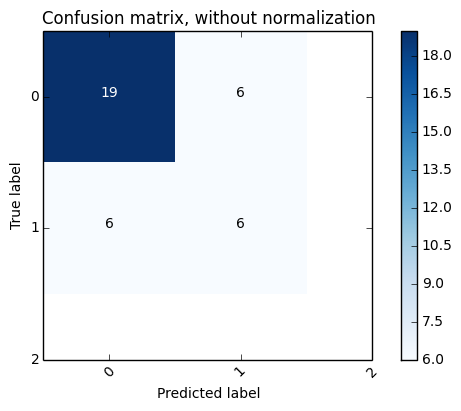

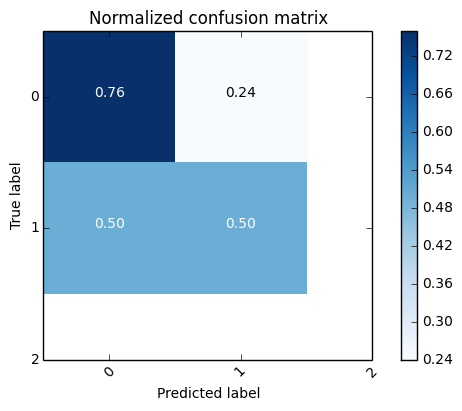

In [34]:
from six.moves import range
from six.moves import zip
import itertools
from sklearn.metrics import confusion_matrix

cm = confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_classes, pred_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Model Summary Statistics

In [150]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_classes, pred_classes)
cm.print_stats()

population: 27
P: 6
N: 21
PositiveTest: 4
NegativeTest: 23
TP: 2
TN: 19
FP: 2
FN: 4
TPR: 0.333333333333
TNR: 0.904761904762
PPV: 0.5
NPV: 0.826086956522
FPR: 0.0952380952381
FDR: 0.5
FNR: 0.666666666667
ACC: 0.777777777778
F1_score: 0.4
MCC: 0.278639106288
informedness: 0.238095238095
markedness: 0.326086956522
prevalence: 0.222222222222
LRP: 3.5
LRN: 0.736842105263
DOR: 4.75
FOR: 0.173913043478


# Validation of Results

In [418]:
def get_cik_symbol():
    
    cik_data = pd.read_csv('sample_8k.csv')
    symbols = pd.read_csv('symbol_cik_map.csv')
    
    cik_list = list(symbols['cik'])
    
    count = 0
    symbol_list = []
    for idx in range(len(cik_data)):
        cik = cik_data.iloc[idx]['CIK']
        if cik in cik_list:
            row = symbols[symbols['cik'] == cik].reset_index()
            symbol_list.append(row['symbol'][0])

        else:
            symbol_list.append('NV')
            
    cik_data['symbol'] = symbol_list
    
    cik_data_filtered = cik_data[cik_data['symbol'] != 'NV']
    
    return cik_data_filtered

In [419]:
def augment_data(all_data_filtered, cik_data_filtered):
    
    companies = list(cik_data_filtered['Company_Name'])

    symbol = []
    date = []

    for i in range(len(all_data_filtered)):

        company = all_data_filtered.iloc[i]['company name']
        if company in companies:
            df = cik_data_filtered[cik_data_filtered['Company_Name'] == company]
            symbol.append(df.iloc[0]['symbol'])
            date.append(df.iloc[0]['Date_Filed'])
        else:
            symbol.append('NV')
            date.append('NV')
            
    all_data_filtered['symbol'] = symbol
    all_data_filtered['date'] = date
    
    all_data_filtered_2 = all_data_filtered[all_data_filtered['symbol'] != 'NV']
    
    return all_data_filtered_2

In [ ]:
# testing 
pos = all_data_filtered_2[all_data_filtered_2['label'] == 1]
neg = all_data_filtered_2[all_data_filtered_2.label == 0]

stocks_remove = ['GY', 'XNWK', 'ADRV', 'NAQ', 'LBTY', 'PKS', 'FCZA', 'MFRM', 'FCL', 'EXLP', 'SCRA', 'TKMR', 'HELI', 'NEPA', 'SNUS', 'ARGN', 
                 'SCBT', 'WSCU', 'GEB', 'SPW', 'MNDL', 'ASXHTW', 'TC', 'VGGL', 'STCK', 'MDH', 'TRB', 'ARVT', 'PGN', 'ATAXZ', 'CHDO', 'IMX',
                'TSTF', 'PPRO', 'COIN', 'SHPGY', 'STR', 'PZZI', 'SGGH', 'LINTA', 'TAXI', 'GB', 'GIFD', 'LLTI', 'XLRN',
                'WSEG', 'LRY', 'NBCB', 'IRHC', 'INSW', 'COUP', 'BTU', 'SNDK', 'NAVR', 'ABK', 'LNCO', 'TELK']
for stock in stocks_remove:
    all_data_filtered_2 = all_data_filtered_2[all_data_filtered_2.symbol != stock]

In [ ]:
@timeout_decorator.timeout(5)
def get_stock_data(symbol, start, end):
    return web.DataReader(symbol,'morningstar', start, end)

In [420]:
def get_cum_returns_stock(pos):
    
    count = 0
    all_returns = []
    cum_prod_index = []
    df = pd.DataFrame()

    for i in range(len(pos)):

        row = pos.iloc[i]

        symbol = row['symbol']

        print symbol

        date = row['date']    
        date_list = date.split('-')
        date_list_int = [int(item) for item in date_list]


        today = dt.datetime(date_list_int[0], date_list_int[1], date_list_int[2])
        start = today - BDay(1)
        end = today + BDay(3)

        try:
            result = get_stock_data(symbol,start,end)
            returns = (result.Close - result.Close.shift(1))/result.Close.shift(1)
            returns_list = list(returns)

            cum_prod_index.append(reduce(mul, returns_list[1:], 1))

            all_returns.extend(returns_list)

            df = df.append(result)
            count += 1
            print count

        except Exception as e:
            print e
            continue
            
    df.to_csv('stock_data_pos.csv')
    stock_data = pd.read_csv('stock_data_pos.csv')
    stock_data['returns'] = all_returns
    stock_data_filtered = stock_data.dropna()
    
    pos['cum_prod'] = cum_prod_index
    
    return pos

In [421]:
def get_index_returns(pos):
    
    count = 0
    index_returns = []
    cum_prod_index = []
    index_df = pd.DataFrame()

    for i in range(len(pos)):

        row = pos.iloc[i]
        date = row['date']    
        date_list = date.split('-')
        date_list_int = [int(item) for item in date_list]


        today = dt.datetime(date_list_int[0], date_list_int[1], date_list_int[2])
        start = today - BDay(1)
        end = today + BDay(3)

        try:
            result = get_stock_data('COMP',start,end)
            returns = (result.Close - result.Close.shift(1))/result.Close.shift(1)
            returns_list = list(returns)

            cum_prod_index.append(reduce(mul, returns_list[1:], 1))

            index_returns.extend(returns_list)

            index_df = index_df.append(result)
            count += 1
            print count

        except Exception as e:
            print e
            continue
            
    index_df.to_csv('pos_index_df.csv')
    index_data_pos = pd.read_csv('pos_index_df.csv')
    index_data_pos['returns'] = index_returns
    index_data_pos_filtered = index_data_pos.dropna()
    
    pos['index_cum'] = cum_prod_index

In [ ]:
pos['abnormal_return'] = pos['cum_prod'] - pos['index_cum']

In [ ]:
market_labels = []
for idx in range(len(pos)):
    row = pos.iloc[idx]
    if row['abnormal_return'] > 0:
        market_labels.append(1)
    else:
        market_labels.append(0)
        
pos['market_labels'] = market_labels

In [ ]:
pos.to_csv('pos_with_prod.csv')

# Miscellaneous

In [242]:
def ConvNet_yookim(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3, 4, 5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = concatenate(convs, axis=1)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    #conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    #pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    # Finally, we feed the output into a Sigmoid layer.
    # The reason why sigmoid is used is because we are trying to achieve a binary classification(1,0) 
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [243]:
#test model
model_yk_modified = ConvNet_yookim(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                len(labels_index), False)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 5000)         0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 5000, 300)    13388700    input_12[0][0]                   
__________________________________________________________________________________________________
conv1d_32 (Conv1D)              (None, 4998, 128)    115328      embedding_12[0][0]               
__________________________________________________________________________________________________
conv1d_33 (Conv1D)              (None, 4997, 128)    153728      embedding_12[0][0]               
__________________________________________________________________________________________________
conv1d_34 